In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load pv data for continuous_1
path = '../dataset/pv/20230309/continuous_1.gz'
data = pd.read_csv(path, compression='gzip', skiprows=7, delimiter='\t',header=None)
start_s=0
end_s=5
ms=False
# data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    ts = data[0][1]-data[0][0]
    fs = int(np.rint(1/ts))
else:
    ts = (data[0][1]-data[0][0])/1000
    fs = int(np.rint(1/ts))

time = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
pv = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)

(5000,)
(51, 101)
[[ 1.80738223e+02+0.00000000e+00j  3.54520391e+02+0.00000000e+00j
   3.54640420e+02+0.00000000e+00j ...  3.59572523e+02+0.00000000e+00j
   3.59622355e+02+0.00000000e+00j  1.76224152e+02+0.00000000e+00j]
 [-9.21365853e+01+1.12758408e+02j -1.77270007e+02+4.71014466e-02j
  -1.77327033e+02+1.68386128e-02j ... -1.79799575e+02+4.50232325e-02j
  -1.79806864e+02-2.62849537e-02j -8.63224185e+01-1.14432688e+02j]
 [ 3.54922812e+00-7.50998475e+01j  8.93745742e-03-1.45578617e-02j
   1.65148261e-02-8.52988744e-03j ...  1.52688061e-02+4.78681786e-03j
  -7.34507256e-03+3.03296748e-02j -3.58944061e+00+7.62416886e+01j]
 ...
 [ 3.54598843e+00-2.33615051e-01j  5.46000709e-03+9.14810337e-03j
   7.89161940e-03+1.40455370e-02j ... -6.92122848e-05+1.15915026e-03j
  -7.41645318e-05+2.02675773e-03j -3.60846539e+00+2.25259841e-01j]
 [-3.54070220e+00+1.19739713e-01j -8.51028292e-03-8.79820655e-03j
  -1.35210187e-02-1.15133502e-02j ...  4.98469470e-03-8.06547267e-03j
  -8.27410170e-03+1.37621877e

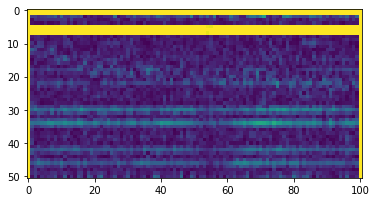

In [59]:
from scipy import signal

print(np.shape(pv[:,0]))
# perform fft on pv data with window length of 0.1s
f, t, Zxx = signal.stft(pv[:,0], fs, nperseg=100, axis=-1)

print(np.shape(Zxx))
print(Zxx)
#plt.plot(pv)
plt.imshow(np.abs(Zxx[:,0:900]),vmax=0.1,vmin=0)

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class LSTMTagger(nn.Module):

    def __init__(self, input_dim, hidden_dim, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(input_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

    def forward(self, data):
        lstm_out, _ = self.lstm(data.view(len(data), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(data), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores
    
INPUT_DIM = 4
HIDDEN_DIM = 6
TARGET_SIZE = 4